# Damped Rabi Oscillations in a Two Level System
## Alex Saunders, Petros Kousis

Experminenting how the Rabi Oscillations behave with spontaneous emission

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

The two level system (TLS) describes an atoms ground state |g> and excited state |e>. 
Normally Rabi oscillations take place in a TLS meaning that the expectation value of electrons oscillate as $\cos^2(wt)$


The Hamiltonian for a TLS is defined as:
$H = \frac{\Delta}{2}\sigma_x$
We can introduce a collapse operator that descirbes energy lost to the system (i.e. spontaneous emission).
$C = \sqrt{g}\sigma_z$
Where $g$ is the dissipation coefficient. The system is defined to be in the ground state at $t=0$

### Parameters
Using units $\hbar = 1$

In [7]:
# coefficients
delta = 2 * np.pi
g = 0.5

# hamiltonian
H = delta / 2.0 * sigmax()

# list of collapse operators
c_ops = [np.sqrt(g) * sigmaz()]

# initial state
psi0 = basis(2, 0)

# times
tlist = np.linspace(0, 5, 200)

Using qubit mesolve to solve the hamiltonian

In [8]:
res = mesolve(H, psi0, tlist, c_ops, [sigmaz()])

We know the analytic solution for a TLS

In [9]:
sz_analytic = np.cos(2 * np.pi * tlist) * np.exp(-tlist * g)

### Plot

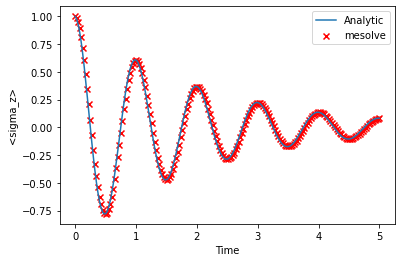

In [10]:
plt.scatter(tlist, res.expect[0], c="r", marker="x", label="mesolve")
plt.plot(tlist, sz_analytic, label="Analytic")
plt.xlabel("Time"), plt.ylabel("<sigma_z>")
plt.legend();

## Bibliography
[1] CJ Foot, Atomic Physics,
[2] QuTiP Tutorials, https://nbviewer.org/urls/qutip.org/qutip-tutorials/